In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#
with open("all_texts.pkl", "rb") as f:
    pv_dict = pickle.load(f)
    texts = [pv_dict[key] for key in pv_dict.keys()]

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')

pv_sents = [sent_tokenize(text) for text in pv_dict.values()]
pv_words = [word_tokenize(text) for text in pv_dict.values()]

sent_count = [len(sent) for sent in pv_sents]
word_count = [len(word) for word in pv_words]

In [5]:
from scipy import stats

def quick_Shapiro(data):
    statistic, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test: W = {statistic}, p = {p_value}")
    if p_value > 0.05:
        print("数据符合正态分布 (p > 0.05)")
    else:
        print("数据不符合正态分布 (p <= 0.05)")

def outliers_clean(data, threshold = 2.5):
    # 计算每个数据点的 Z-score
    z_scores = stats.zscore(data)

    # 找出 Z-score 绝对值大于threshold的异常值
    outliers = np.where(np.abs(z_scores) > threshold)
    clean_data = np.delete(data, outliers[0])

    return clean_data

def outliers_id(data, threshold = 2.5):
    # 计算每个数据点的 Z-score
    z_scores = stats.zscore(data)

    # 找出 Z-score 绝对值大于threshold的异常值
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers[0]

In [6]:
def quick_hist(data, bins=10, title = "Histogram of List Data"):
    # Plot the histogram
    plt.hist(data, bins, color='skyblue', edgecolor='black')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Display the plot
    plt.show() 

In [7]:
quick_Shapiro(sent_count)
quick_Shapiro(word_count)

Shapiro-Wilk Test: W = 0.6977021552945781, p = 3.7623155829203333e-32
数据不符合正态分布 (p <= 0.05)
Shapiro-Wilk Test: W = 0.5161525812999527, p = 2.6577887010127677e-38
数据不符合正态分布 (p <= 0.05)


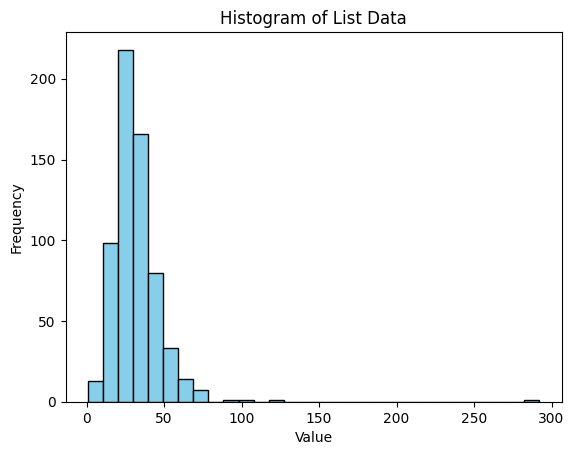

In [8]:
quick_hist(sent_count, 30)

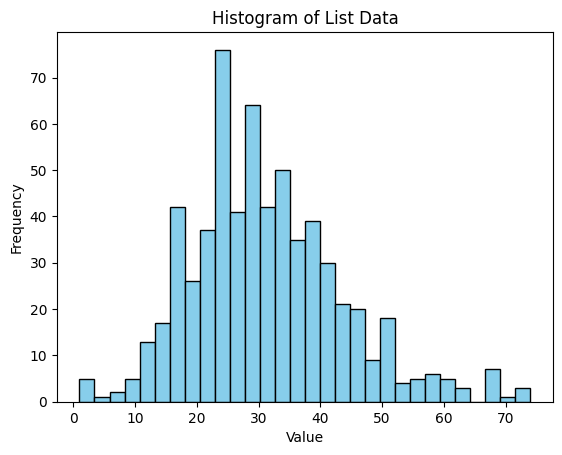

In [9]:
quick_hist(outliers_clean(sent_count), 30)

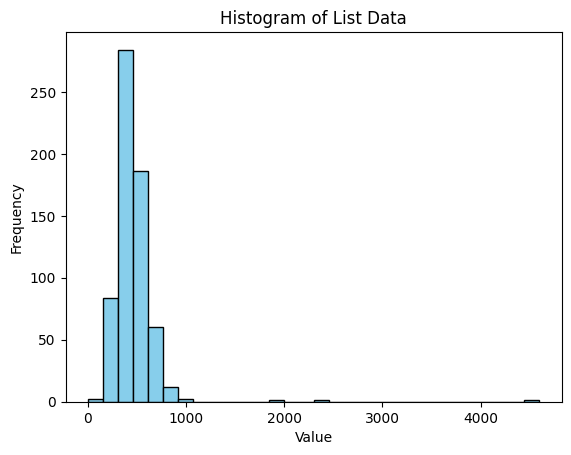

In [10]:
quick_hist(word_count, 30)

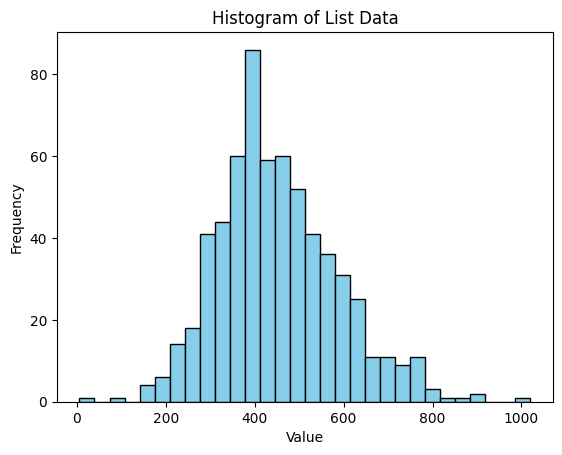

In [11]:
quick_hist(outliers_clean(word_count), 30)

In [26]:
#
words_outlier = outliers_id(word_count)
sents_outlier = outliers_id(sent_count)
idx_outliers = np.union1d(words_outlier, sents_outlier)

#
words_short = np.where(np.array(word_count) < 100)
sents_short = np.where(np.array(sent_count) < 10)
idx_short = np.union1d(words_short, sents_short)

#
remove_idx = np.union1d(idx_outliers, idx_short)

In [24]:
pv_filtered = dict()
for idx, item in enumerate(pv_dict.items()):
    if not idx in remove_idx:
        key, value = item
        pv_filtered[key] = value

In [25]:
# Save as a pickle file
with open("pv_filtered.pkl", "wb") as f:
    pickle.dump(pv_filtered, f)